# TD 2 : corrigé des exercices 2 et 3

## EXERCICE 2 : Rejet et loi de Laplace

### 2.1.

**voir corrigé TD2 (13/03/20) :** proposition de generateur de laplace (methode d'inversion)

**code :**

In [1]:
# generateur de la loi de laplace
rand_laplace <- function(n){
  # par inversion
  ru = runif(n)
  return( log(2*ru)*(ru<1/2) + -log(2*(1-ru))*(ru>=1/2) )
}
# densite de la loi de Laplace
density_laplace <- function(x){
  return( (1/2) * exp(-abs(x)) )
}

generons un echantillon de taille n = 20 000

In [2]:
n = 20000
sample = rand_laplace(n)

verifions que l'histogramme et la densite se superposent bien

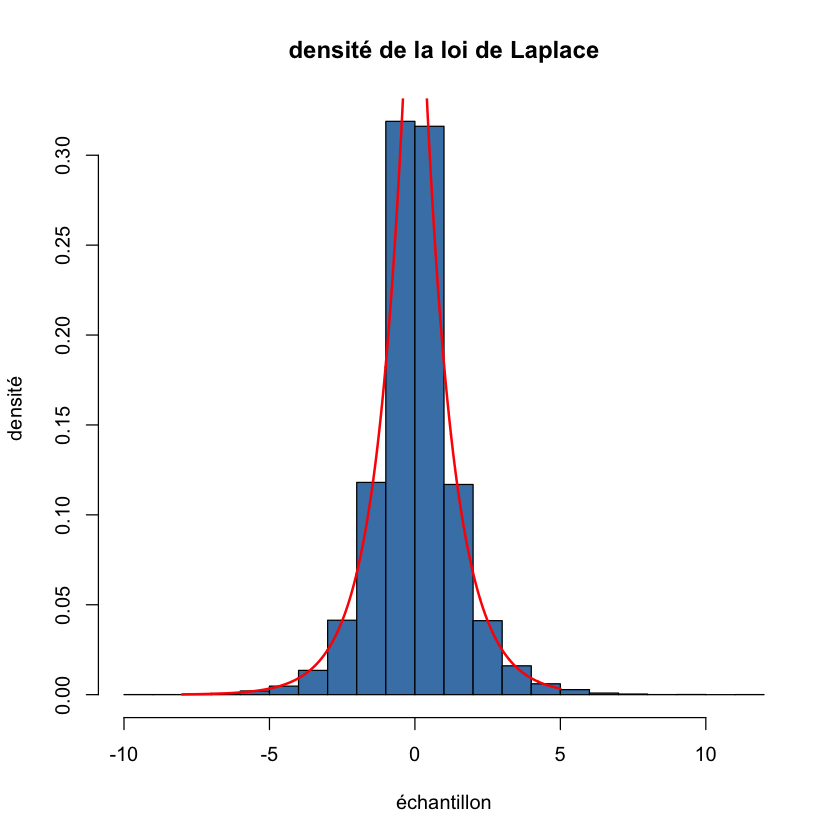

In [7]:
hist(sample, prob = TRUE, col = "steelblue",
     main = "densité de la loi de Laplace",
    xlab = "échantillon",
    ylab = "densité")
x = seq(-8, 5, 0.01)
lines(x, density_laplace(x), col = "red", lwd = 2)

### 2.2.

**voir corrigé TD2 (13/03/20):** proposition de generateur de la loi normale (methode de rejet-acceptation)

**code :**

In [8]:
# generateur de la loi gaussienne a l'aide de
# l'algorithme rejet-acceptation et du generateur de la loi de Laplace
rand_gauss <- function(n){
  # ar method
  m = sqrt((2*exp(1))/pi)
  rn = rep(0, n)
  total = 0
  for(i in 1:n){
    rn[i] = rand_laplace(1)
    total = total + 1
    while( dnorm(rn[i]) < density_laplace(rn[i])*m*runif(1) ){
      rn[i] = rand_laplace(1)
      total = total + 1
    }
  }
  return(list("sample" = rn, "n_loop" = total))
}

générons un échantillon de taille $n = 20 000$

In [10]:
n = 20000
sample_norm = rand_gauss(n)

vérifions que l'histogramme et la densité se superposent bien

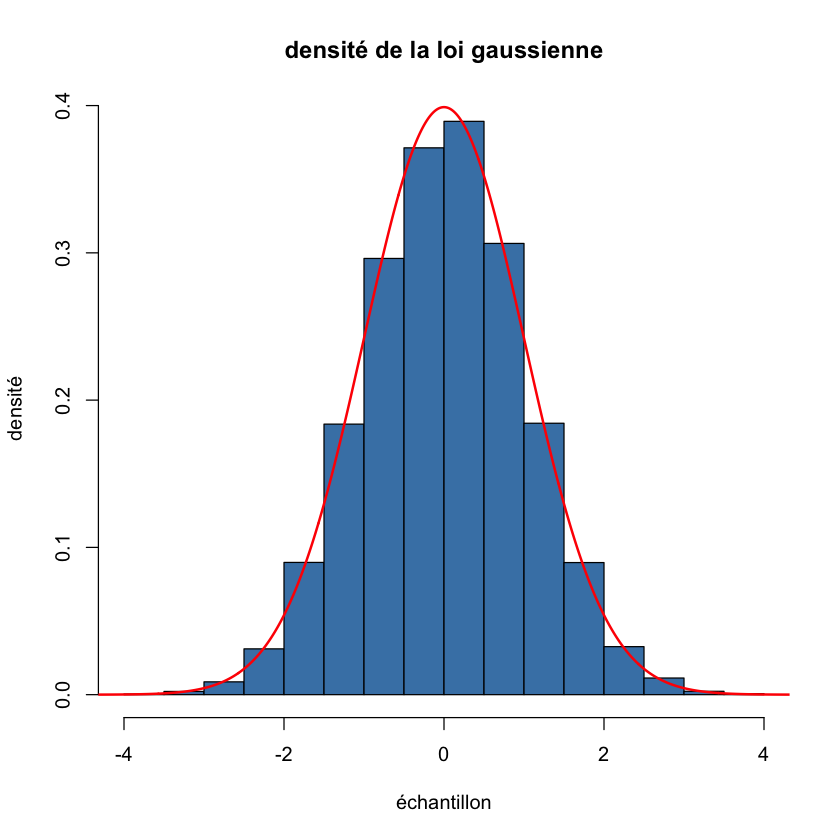

In [12]:
hist(sample_norm$sample, prob = TRUE, col = "steelblue",
     main = "densité de la loi gaussienne",
    xlab = "échantillon",
    ylab = "densité")
x = seq(-10, 10, 0.01)
lines(x, dnorm(x), col = "red", lwd = 2)

### 2.3.

In [14]:
rate_1 = length(sample_norm$sample) / sample_norm$n_loop
rate_1

[1] 0.7538351

le taux d'acceptation de l'algorithme est de **rate_1 = 0.76**.

Voici une proposition de simplification de la condition d'acceptation :

In [15]:
rand_gauss_opt <- function(n){
  # methode acceptation-rejet
  rr = 2*round(runif(n))-1 # sampling n Rademacher
  rn = rep(0,n)
  total = 0
  for(i in 1:n){
    y = rexp(1)
    total = total + 1
    while( exp(-(y-1)^2/2) <= runif(1) ){
      y = rexp(1)
      total = total + 1
    }
    rn[i] = rr[i]*y
  }
  return(list("sample" = rn, "n_loop" = total))
}

Regardons si la densité et de l'histogramme représentant l'échantillon généré se superposent bien

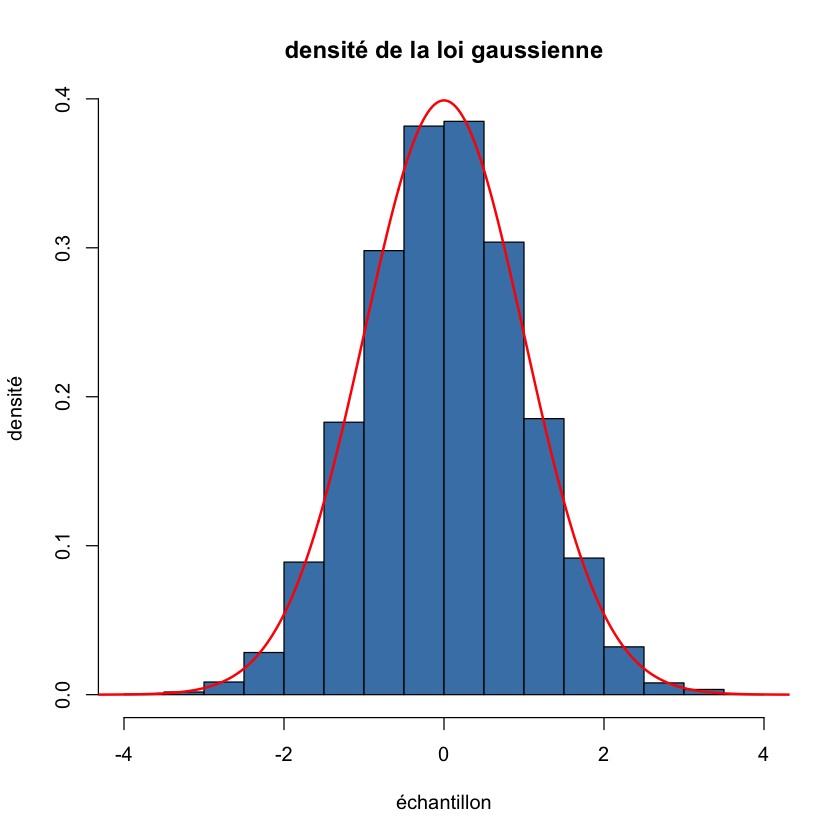

In [18]:
sample_norm_opt = rand_gauss_opt(20000)
hist(sample_norm_opt$sample, prob = TRUE, col = "steelblue",
     main = "densité de la loi gaussienne",
    xlab = "échantillon",
    ylab = "densité")
lines(x, dnorm(x), col = "red", lwd = 2)

comparons le temps de calcul entre les deux fonctions suivantes : 
- **rand_gauss** : générateur de la loi gaussienne par l'algorithme acceptation-rejet
- **rand_gauss_opt** : générateur de la loi gaussienne par l'algorithme acceptation-rejet simplifié

In [20]:
n = 800000

t0=proc.time()
sample_norm = rand_gauss(n)
t_norm = proc.time()-t0

t1=proc.time()
sample_norm_opt = rand_gauss_opt(n)
t_norm_opt = proc.time()-t1

print(paste0("l'algorithme 'classique' nous donne ",t_norm["elapsed"], " sec"))
print(paste0("l'algorithme 'optimisé' nous donne ",t_norm_opt["elapsed"], " sec"))

[1] "l'algorithme 'classique' nous donne 8.57299999999987 sec"
[1] "l'algorithme 'optimisé' nous donne 5.6239999999998 sec"


Notons que la fonction rand_gauss_opt est plus rapide que la fonction rand_gauss

### 2.4

Posons pour tout $x$, 

$$r(x) = \frac{p(x)}{f(x)} = \sqrt{\frac{\pi}{2}} e^{-|x| + x^2/2} $$

Nous avons quand $x \to + \infty$:

$$r(x) \to +\infty$$

Il n'existe donc pas de constante $M$ qui puisse majorer $r$. Ainsi, nous ne pouvons pas générer la loi de Laplace via la loi normale à l'aide de l'algorithme rejet-acceptation

## EXERCICE 3 : Box-Muller amélioré

Dans la suite nous appelons :
- **BM** pour la méthode Box-Muller "classique" (la version **cartésienne**)
- **BMA** pour la méthode Box-Muller "amélioré" (la version **polaire**)

### 3.1.
Voir corrigé TD2

### 3.2.

Bien que BMA rejette certains points ($1 - \frac{\pi}{4}$, ce qui correspond à env. $20\%$), l'algorithme BM requiert des calculs trigonométriques (calcul de sin et cos). Ces fonctions trigonométriques ont des désavantages non négligeables :
1. elles sont **coûteuses en temps de calcul** 

$\rightarrow$ BM et BMA ont approximativement le même temps de calcul

2. et leur programme informatique (fonction sous R, python, matlab ...) n'est qu'**approximation** des "vrais" fonctions trigonométriques

$\rightarrow$ à la place BMA propose une simple division, ce qui rend le code plus robuste

In [124]:
rand_gauss_BM <- function(n){
    # generateur de n gaussiens par BM standard
    rn <- rep(0,n)
    for(i in seq(1, n, by=2)){
        ru <- runif(1)
        rv <- runif(1)
        rn[i] <- sqrt(-2*log(ru)) * sin(2*pi*rv)
        rn[i+1] <- sqrt(-2*log(ru)) * cos(2*pi*rv)
    }
    return(rn)
}

In [125]:
rand_gauss_BMA <- function(n){
    # generateur de n gaussiens par BM "ameliore"
    rn <- rep(0,n)
    for(i in seq(1, n, by=2)){
      ru1 <- runif(1,-1,1)
      ru2 <- runif(1,-1,1)
      while(ru1**2 + ru2**2 > 1){
        ru1 <- runif(1,-1,1)
        ru2 <- runif(1,-1,1)
      }
      s <- ru1**2 + ru2**2
      rn[i] <- ru1*sqrt(-2*log(s)/s)
      rn[i+1] <- ru2*sqrt(-2*log(s)/s)
    }
    return(rn)
}

In [126]:
n = 20000

t0=proc.time()
sample_norm_BM <- rand_gauss_BMA(n)
t_norm = proc.time()-t0

t1=proc.time()
sample_norm_BMA <- BMPolaire(n)
t_norm_opt = proc.time()-t1

print(paste0("temps machine pour l'algorithme 'classique' : ",t_norm["elapsed"], " sec"))
print(paste0("temps machine pour l'algorithme 'optimisé' : ",t_norm_opt["elapsed"], " sec"))

[1] "temps machine pour l'algorithme 'classique' : 0.129000000000815 sec"
[1] "temps machine pour l'algorithme 'optimisé' : 0.165999999997439 sec"


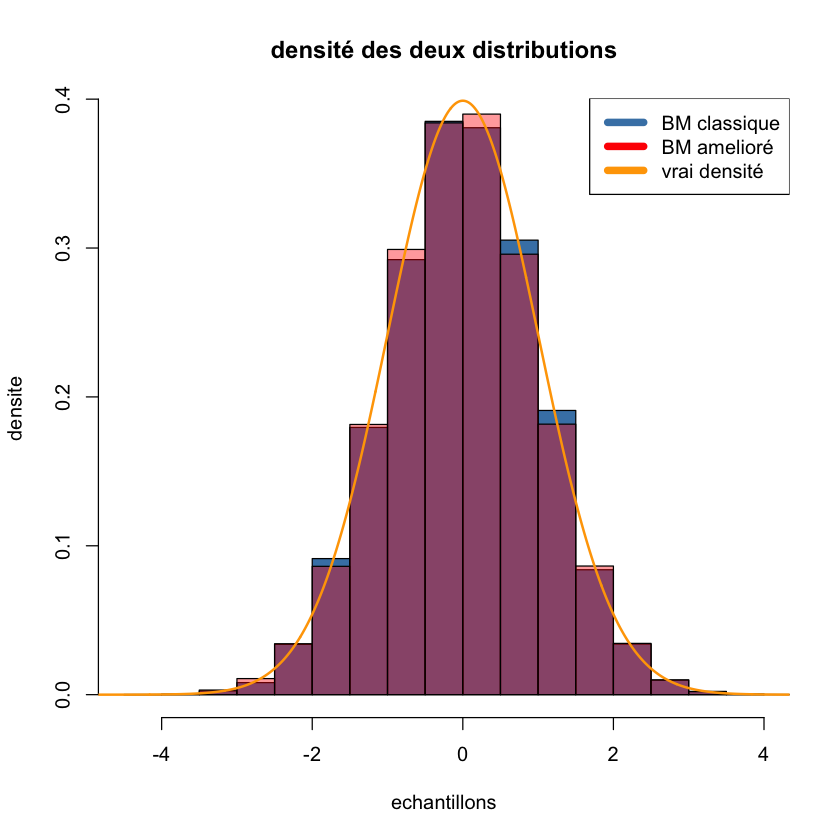

In [127]:
# graphique
hist(sample_norm_BM, prob = TRUE, col = "steelblue",
     main = "densité des deux distributions",
     xlab = "echantillons",
     ylab = "densite")
hist(sample_norm_BMA, prob = TRUE, col = rgb(1,0,0,0.4), add=T)
x = seq(-10, 10, 0.01)
lines(x, dnorm(x), col = "orange", lwd = 2)
legend("topright", c("BM classique", "BM amelioré", "vrai densité"), col=c("steelblue", "red", "orange"), lwd=6)

**Rermarque importante** : l'implémentation suivante permet de construire un générateur beaucoup plus rapide que les implémentations précédentes. 

**Exercice** : Pourquoi ?

In [128]:
rand_gauss_BM_bis <- function(n){
  # generateur de n gaussiens par BM standard
  ru = runif(n/2)
  rv = runif(n/2)
  rn = c(sqrt(-2*log(ru)) * sin(2*pi*rv), sqrt(-2*log(ru)) * cos(2*pi*rv))
  return(rn)
}

In [129]:
n = 100000

# générateur BM version cartésiennes
t0=proc.time()
sample_norm_BM <- rand_gauss_BM(n)
t_norm = proc.time()-t0

# générateur BM  version cartésiennes avec le programme modifié
t0_bis=proc.time()
sample_norm_BM <- rand_gauss_BM_bis(n)
t_norm_bis = proc.time()-t0_bis

# générateur BM version polaire
t1=proc.time()
sample_norm_BMA <- rand_gauss_BMA(n)
t_norm_opt = proc.time()-t1

print(paste0("temps machine pour BM : ",t_norm["elapsed"], " sec"))
print(paste0("temps machine pour BM_bis : ",t_norm_bis["elapsed"], " sec"))
print(paste0("temps machine pour BMA : ",t_norm_opt["elapsed"], " sec"))

[1] "temps machine pour BM : 0.31000000000131 sec"
[1] "temps machine pour BM_bis : 0.00899999999819556 sec"
[1] "temps machine pour BMA : 0.347000000001572 sec"
